# IFN-HBEC Variability tSNE

In [1]:
import scanpy as sc
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/data/home/anaconda3/envs/single_cell/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data_path = '/data_volume/ifn_hbec/'

### Read the normalize

In [3]:
rna_adata_counts = sc.read(data_path + 'HBEC_type_I_filtered_counts_deep.h5ad')

In [4]:
rna_adata_counts.obs.head()

,NUM.SNPS,BEST.GUESS,DROPLET.TYPE,batch,HTO_classification,condition,donor,stim,time,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,cell_type
AAACCCAAGGAAGTAG-1,1700,donor0,SNG,0,hash-10,d2513_lambda_9,d2513,lambda,9,4297,4297,12191.0,1394.0,11.434665,3,ciliated
AAACCCAAGGGACTGT-1,839,donor0,SNG,0,hash-3,d2513_alpha_24,d2513,alpha,24,2171,2171,7270.0,386.0,5.309491,5,basal/club
AAACCCACAATCTGCA-1,1130,donor1,SNG,0,hash-1,d2614_alpha_3,d2614,alpha,3,3016,3016,9544.0,516.0,5.406538,0,basal
AAACCCACACGTTCGG-1,989,donor1,SNG,0,hash-1,d2614_alpha_3,d2614,alpha,3,2748,2748,8248.0,583.0,7.068380,19,basal
AAACCCACAGAACTAA-1,997,donor1,SNG,0,hash-8,d2614_gamma_48,d2614,gamma,48,2885,2885,7765.0,729.0,9.388281,14,basal/club


In [5]:
rna_adata = rna_adata_counts[
    rna_adata_counts.obs.stim.isin(['alpha', 'beta']) &\
    (rna_adata_counts.obs.cell_type == 'ciliated')].copy()

In [6]:
sc.pp.normalize_total(rna_adata, target_sum=1e4)
sc.pp.log1p(rna_adata)
sc.pp.highly_variable_genes(rna_adata, min_mean=0.01, max_mean=3, min_disp=0.5, batch_key='donor')
rna_adata = rna_adata[:, rna_adata.var.highly_variable & ~rna_adata.var.mt]
sc.pp.regress_out(rna_adata, ['total_counts', 'pct_counts_mt'])


In [7]:
sc.pp.scale(rna_adata, max_value=10)
sc.tl.pca(rna_adata, svd_solver='arpack')
sc.pp.neighbors(rna_adata, n_neighbors=30, n_pcs=40)
sc.tl.umap(rna_adata)

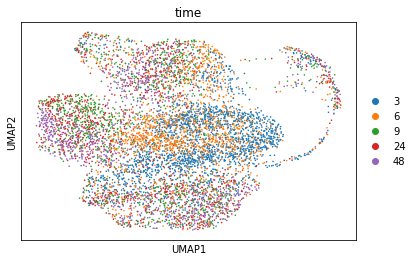

In [8]:
sc.pl.umap(rna_adata, color=['time'], s=10)

In [9]:
def plot_umap(tp):
    
    X_umap = rna_adata.obsm['X_umap']
    indices = (rna_adata.obs.time == tp).values
    plt.scatter(X_umap[indices, 0], X_umap[indices, 1], s=3)
    plt.xlim(-10, 2); plt.ylim(-10, 2)

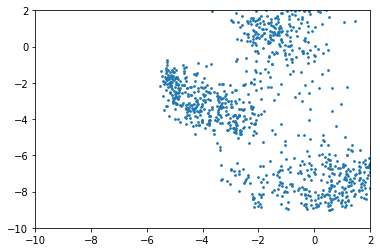

In [10]:
plot_umap('48')